In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
#reviewing
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

Text Preprocessing Task
- Remove Html tags
- Remove Special Characters
- Convert everything into lower case
- Remove Stop Words
- Stemming

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df = df.sample(30000)

In [8]:
#Replacing the sentiment with 0 and 1
df['sentiment'].replace({'positive':1, 'negative':0}, inplace = True)

In [9]:
df.head()

,review,sentiment
20322,This film was very different form the previous...,1
22123,After being a big fan of the ten minute T.V ep...,0
30660,Gayniggers from Outer Space is a short foreign...,0
12105,Watching it now it's still as skanky and sexis...,0
12867,"If this guy can make a movie, then I sure as h...",0


In [10]:
#using RegEx library to remove the html tags
import re
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [11]:
df['review'] = df['review'].apply(clean_html)

In [12]:
#Converting into lower case
def convert_lower(text):
    return text.lower()

In [13]:
df['review'] = df['review'].apply(convert_lower)

In [14]:
#function to remove special characters
def remove_special(text):
    x = ''
    
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x = x + ' '
    return x
        

In [15]:
df['review'] = df['review'].apply(remove_special)

In [16]:
#Stemming
import nltk
!pip install nltk

In [17]:
from nltk.stem.porter import PorterStemmer
#creating object of the PorterStemmer class
ps = PorterStemmer()

In [18]:
def stem(text):
    y = []
    
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [19]:
df['review'] = df['review'].apply(stem)

In [21]:
df['review']

20322    thi film wa veri differ form the previou film ...
22123    after be a big fan of the ten minut t v episod...
30660    gaynigg from outer space is a short foreign fi...
12105    watch it now it s still as skanki and sexist a...
12867    if thi guy can make a movi then i sure as hell...
                               ...                        
20129    i am a fan of slasher movi especi of scream 1 ...
16917    i wa blub like an idiot dure the last ten minu...
19992    superb and charm justin henri is beauti as a b...
36810    the chipmunk adventur there are some movi that...
32392    i first saw thi film in 1980 in the midday mov...
Name: review, Length: 30000, dtype: object

In [43]:
df

,review,sentiment
20322,thi film wa veri differ form the previou film ...,1
22123,after be a big fan of the ten minut t v episod...,0
30660,gaynigg from outer space is a short foreign fi...,0
12105,watch it now it s still as skanki and sexist a...,0
12867,if thi guy can make a movi then i sure as hell...,0
...,...,...
20129,i am a fan of slasher movi especi of scream 1 ...,0
16917,i wa blub like an idiot dure the last ten minu...,1
19992,superb and charm justin henri is beauti as a b...,1
36810,the chipmunk adventur there are some movi that...,1


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [23]:
x = cv.fit_transform(df['review']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
df['review']

20322    thi film wa veri differ form the previou film ...
22123    after be a big fan of the ten minut t v episod...
30660    gaynigg from outer space is a short foreign fi...
12105    watch it now it s still as skanki and sexist a...
12867    if thi guy can make a movi then i sure as hell...
                               ...                        
20129    i am a fan of slasher movi especi of scream 1 ...
16917    i wa blub like an idiot dure the last ten minu...
19992    superb and charm justin henri is beauti as a b...
36810    the chipmunk adventur there are some movi that...
32392    i first saw thi film in 1980 in the midday mov...
Name: review, Length: 30000, dtype: object

In [26]:
y = df.iloc[:,-1].values

In [27]:
y

array([1, 0, 0, ..., 1, 1, 1])

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y)


In [29]:
x_train.shape

(24000, 58394)

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


In [35]:
clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

In [36]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
clf3.fit(x_train,y_train)

BernoulliNB()

In [37]:
# Make predictions on the test data
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)
y_pred3 = clf3.predict(x_test)

In [38]:
y_test.shape

(6000,)

In [39]:
y_pred1.shape

(6000,)

In [63]:
# Make predictions on the training data
y_train_pred1 = clf1.predict(x_train)
y_train_pred2 = clf2.predict(x_train)
y_train_pred3 = clf3.predict(x_train)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
# Calculate the training accuracy scores
train_acc1 = accuracy_score(y_train, y_train_pred1)
train_acc2 = accuracy_score(y_train, y_train_pred2)
train_acc3 = accuracy_score(y_train, y_train_pred3)

In [66]:
# Calculate the training accuracy scores
test_acc1 = accuracy_score(y_test,y_pred1)
test_acc2 = accuracy_score(y_test,y_pred2)
test_acc3 = accuracy_score(y_test,y_pred3)

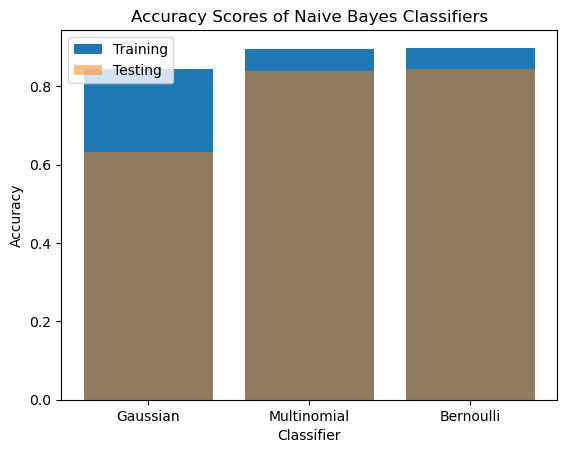

In [67]:
# Plot the accuracy scores
labels = ['Gaussian', 'Multinomial', 'Bernoulli']
train_values = [train_acc1, train_acc2, train_acc3]
test_values = [test_acc1, test_acc2, test_acc3]

plt.bar(labels, train_values, label='Training')
plt.bar(labels, test_values, label='Testing', alpha=0.5)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Naive Bayes Classifiers')
plt.legend()
plt.show()